In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv("train.csv")
data1.head()

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [5]:
data2 = pd.read_csv("medical_advices.csv")
data2.head()

,q_type,question,answer
0,treatment,What is Semaglutide approved for?,"Semaglutide is approved for type 2 diabetes, w..."
1,general_info,What is a potential risk associated with some ...,Some recalled antidepressants may contain a ca...
2,general_info,What could be a negative effect of blowing you...,Blowing your nose might worsen a cold.
3,general_info,What is the benefit of short periods of daily ...,Even a few minutes of daily exercise can boost...
4,general_info,What is 'Sunset Anxiety'?,'Sunset Anxiety' is a feeling of uneasiness as...


In [6]:
# Rename columns in the second dataset to match the first dataset
data1 = data1.rename(columns={"qtype": "q_type", "Question": "question", "Answer": "answer"})

# Combine the datasets
merged_df = pd.concat([data1, data2], ignore_index=True)

merged_df.head()

,q_type,question,answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [7]:
data = merged_df.copy()

In [8]:
data = data.drop_duplicates(subset=["question"])

In [9]:
data.to_csv("data_preprocessed.csv")

In [10]:
data

,q_type,question,answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."
5,prevention,How to prevent Lymphocytic Choriomeningitis (L...,LCMV infection can be prevented by avoiding co...
...,...,...,...
29227,general_info,What is the cause of obesity?,"Obesity is caused, in part, by an energy imbal..."
29228,general_info,What is the difference between a disease and a...,A disease is a specific pathological process t...
29229,general_info,What is the difference between a cause and a r...,A cause is an underlying factor that directly ...
29230,treatment,What are the treatments for obesity?,Treatments for obesity include lifestyle chang...


In [11]:
# Get the length of the 'answer' column
answer_length = data['answer'].str.len()

# If you want to add this as a new column in your DataFrame
data['answer_length'] = answer_length

In [12]:
data

,q_type,question,answer,answer_length
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...,467
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...,2568
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos...",655
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen...",446
5,prevention,How to prevent Lymphocytic Choriomeningitis (L...,LCMV infection can be prevented by avoiding co...,2669
...,...,...,...,...
29227,general_info,What is the cause of obesity?,"Obesity is caused, in part, by an energy imbal...",241
29228,general_info,What is the difference between a disease and a...,A disease is a specific pathological process t...,162
29229,general_info,What is the difference between a cause and a r...,A cause is an underlying factor that directly ...,164
29230,treatment,What are the treatments for obesity?,Treatments for obesity include lifestyle chang...,61


In [13]:
# Sort the DataFrame by the 'answer_length' column
# Use `ascending=True` for ascending order or `ascending=False` for descending order
sorted_data = data.sort_values(by='answer_length', ascending=True)

In [14]:
sorted_data.head(7000).iloc[-1]

q_type                                                general_info
question         Should I consult a doctor before changing my d...
answer           Make sure to work with your healthcare provide...
answer_length                                                  137
Name: 25747, dtype: object

In [15]:
sorted_data['answer_length'].describe()

count    26466.000000
mean       796.239061
std       1372.099133
min          6.000000
25%        133.000000
50%        303.000000
75%       1020.000000
max      28001.000000
Name: answer_length, dtype: float64

In [16]:
sorted_data['answer_length'].tail(20)

2736    17890
2909    18527
2681    19226
2673    19426
3277    20007
2978    21233
3068    21313
2926    21448
3271    21492
2965    21518
4428    21539
4097    22496
3044    23021
3235    23116
3196    23133
2870    23616
2631    23727
4441    25077
3037    27642
2827    28001
Name: answer_length, dtype: int64

In [17]:
sorted_data['answer'].iloc[-1]

'Key Points\r\n                    - Childhood vascular tumors form from cells that make blood vessels or lymph vessels.    - Tests are used to detect (find) and diagnose childhood vascular tumors.    - Childhood vascular tumors may be classified into four groups.         - Benign tumors     - Intermediate (locally aggressive) tumors     - Intermediate (rarely metastasizing) tumors     - Malignant tumors\r\n                \r\n                \r\n                    Childhood vascular tumors form from cells that make blood vessels or lymph vessels.\r\n                    Vascular tumors can form from abnormal blood vessel or lymph vessel cells anywhere in the body. They may be benign (not cancer) or malignant (cancer). There are many types of vascular tumors. The most common type of childhood vascular tumor is hemangioma, which is a benign tumor that usually goes away on its own.   Because malignant vascular tumors are rare in children, there is not a lot of information about what trea

In [18]:
sum(sorted_data['answer_length'])

21073263

In [21]:
data['q_type'].value_counts()

q_type
general_info        6458
treatment           5022
information         3822
symptoms            3652
inheritance         1382
prevention          1364
frequency           1120
genetic changes     1087
causes               660
exams and tests      611
research             369
outlook              354
susceptibility       245
considerations       133
stages                76
complications         45
diagnosis             45
risk_factors           6
emergency              4
support                4
support groups         1
immediate_action       1
emergency_info         1
emergency_care         1
aftercare              1
procedure              1
warning                1
Name: count, dtype: int64

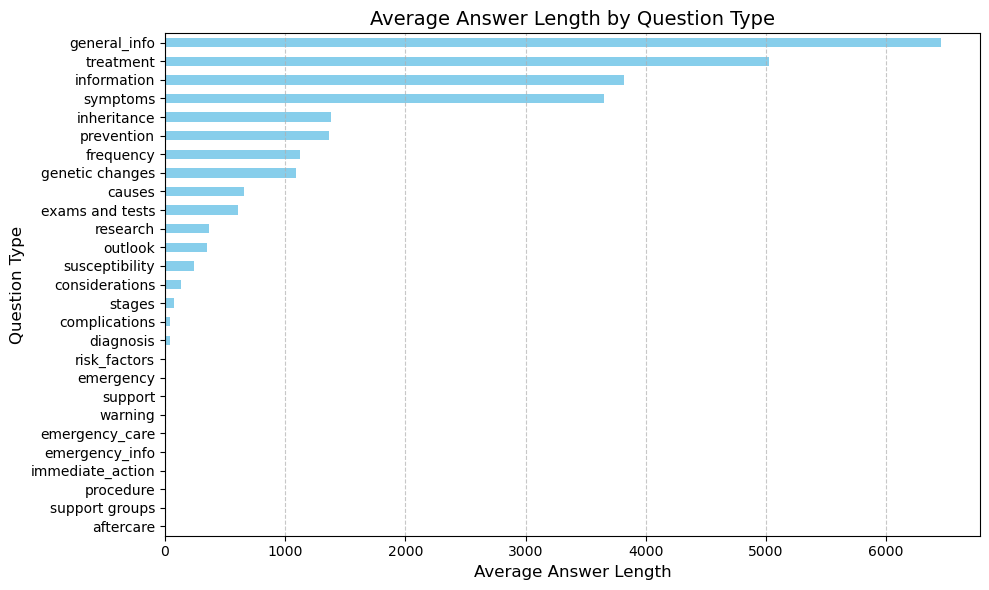

In [20]:
# Group data by 'q_type' and calculate mean answer length
grouped = data.groupby("q_type")["answer_length"].count()

# Plotting
plt.figure(figsize=(10, 6))
grouped.sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Answer Length by Question Type", fontsize=14)
plt.xlabel("Average Answer Length", fontsize=12)
plt.ylabel("Question Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()